<a href="https://colab.research.google.com/github/yash262003/UplianceAI_Assignment/blob/main/Untitled23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Load datasets from different sheets of the same Excel file
file_path = "/content/sample_data/Data Analyst Intern Assignment - Excel.xlsx"
user_details = pd.read_excel(file_path, sheet_name="UserDetails.csv")
cooking_sessions = pd.read_excel(file_path, sheet_name="CookingSessions.csv")
order_details = pd.read_excel(file_path, sheet_name="OrderDetails.csv")

**Data Cleaning**

In [68]:
# Check for missing values
print("Missing values in UserDetails:")
print(user_details.isnull().sum())
print("\nMissing values in CookingSessions:")
print(cooking_sessions.isnull().sum())
print("\nMissing values in OrderDetails:")
print(order_details.isnull().sum())

Missing values in UserDetails:
User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64

Missing values in CookingSessions:
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64

Missing values in OrderDetails:
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [69]:
# Handle missing values
user_details.fillna({'Age': user_details['Age'].mean(), 'Favorite Meal': 'Unknown'}, inplace=True)
cooking_sessions.fillna({'Dish Name': 'Unknown', 'Session Rating': cooking_sessions['Session Rating'].mean()}, inplace=True)
order_details.fillna({'Amount (USD)': order_details['Amount (USD)'].mean(), 'Rating': order_details['Rating'].mean()}, inplace=True)

# Merge datasets
merged_data = pd.merge(user_details, cooking_sessions, on='User ID', how='inner')
merged_data = pd.merge(merged_data, order_details, on=['User ID', 'Dish Name'], how='inner')

**Data Analysis**

In [70]:
# Relationship between cooking sessions and user orders
cooking_order_relation = merged_data.groupby('Dish Name')['Order ID'].nunique().reset_index()
cooking_order_relation = cooking_order_relation.rename(columns={'Order ID': 'OrderCount'})

# Identify popular dishes
popular_dishes = cooking_order_relation.sort_values(by='OrderCount', ascending=False)

# Explore demographic factors influencing user behavior
age_analysis = merged_data.groupby('Age')['Amount (USD)'].mean().reset_index()
favorite_meal_analysis = merged_data.groupby('Favorite Meal')['Amount (USD)'].mean().reset_index()

**Key insights**

In [71]:
# Display key insights
print("\nKey Insights:")
print("\n1. Top 10 popular dishes:")
print(popular_dishes.head(10))


Key Insights:

1. Top 10 popular dishes:
         Dish Name  OrderCount
1  Grilled Chicken           4
4        Spaghetti           4
0     Caesar Salad           3
3         Pancakes           2
5    Veggie Burger           2
2          Oatmeal           1


In [72]:
print("\n2. Average order amount by age:")
print(age_analysis)


2. Average order amount by age:
   Age  Amount (USD)
0   25     13.000000
1   27     10.750000
2   28     11.666667
3   30     11.250000
4   31     11.000000
5   35     10.333333
6   38     14.000000
7   42     10.666667


In [73]:
print("\n3. Average order amount by favorite meal:")
print(favorite_meal_analysis)


3. Average order amount by favorite meal:
  Favorite Meal  Amount (USD)
0     Breakfast          11.5
1        Dinner          11.5
2         Lunch          10.7


**Visualizations**

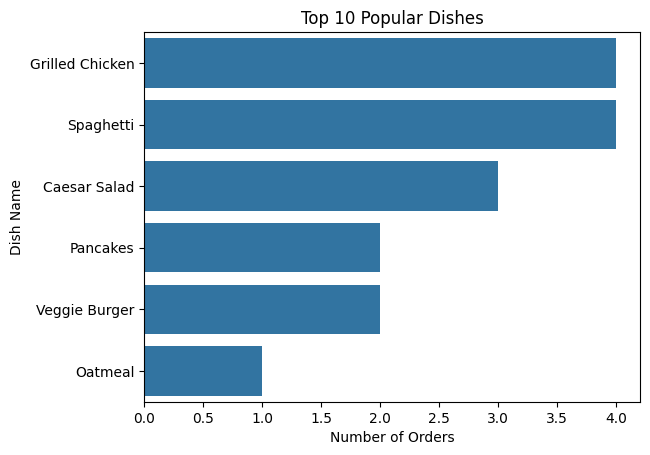

In [74]:
sns.barplot(data=popular_dishes.head(10), x='OrderCount', y='Dish Name')
plt.title('Top 10 Popular Dishes')
plt.xlabel('Number of Orders')
plt.ylabel('Dish Name')
plt.show()

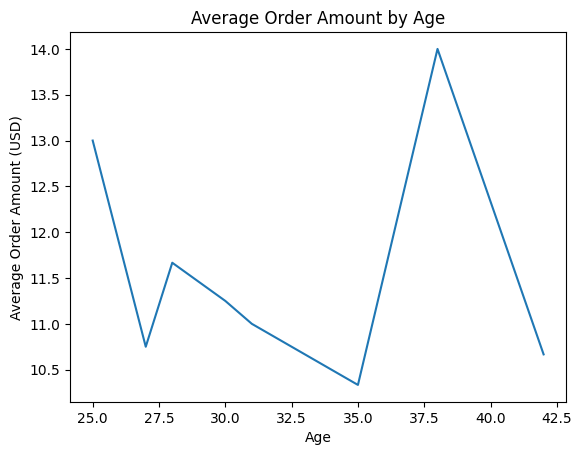

In [75]:
sns.lineplot(data=age_analysis, x='Age', y='Amount (USD)')
plt.title('Average Order Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Order Amount (USD)')
plt.show()

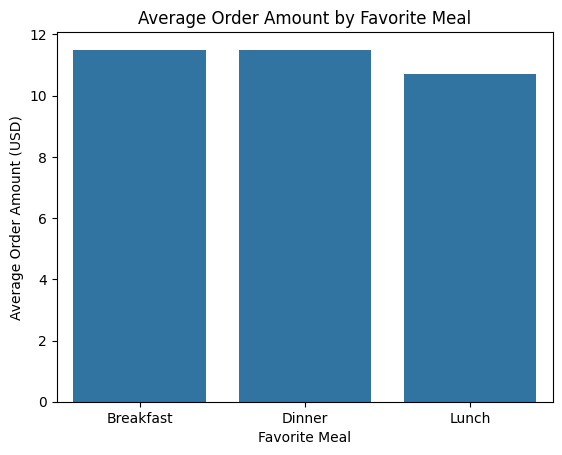

In [76]:
sns.barplot(data=favorite_meal_analysis, x='Favorite Meal', y='Amount (USD)')
plt.title('Average Order Amount by Favorite Meal')
plt.xlabel('Favorite Meal')
plt.ylabel('Average Order Amount (USD)')
plt.show()

In [77]:
# Business Recommendations
print("Business Recommendations:")
print("- Focus on promoting the most popular dishes to increase revenue.")
print("- Create targeted marketing campaigns for age groups with higher average order amounts.")
print("- Analyze the impact of favorite meals on user spending and create personalized meal offers.")

Business Recommendations:
- Focus on promoting the most popular dishes to increase revenue.
- Create targeted marketing campaigns for age groups with higher average order amounts.
- Analyze the impact of favorite meals on user spending and create personalized meal offers.
